# Kaggle Competition: Santander Customer Satisfaction

In [2]:
# import all the things
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# data at a glance

In [4]:
print train.shape
print test.shape
train.head()

(76020, 371)
(75818, 370)


,'ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [6]:
# Unhappy campers are categorized as 1's.
print train.TARGET.value_counts()
# 3008/76022 = 4% rate of discontent

0    73012
1     3008
Name: TARGET, dtype: int64


In [5]:
# check for numbers used as errors/unknowns
s = pd.DataFrame(train.columns, columns=['columns'])
s['min'] = [train[x].min() for x in train.columns]
s['max'] = [train[x].max() for x in train.columns]
s.head()

,columns,min,max
0,'ID,1.0,151838.00
1,var3,-999999.0,238.00
2,var15,5.0,105.00
3,imp_ent_var16_ult1,0.0,210000.00
4,imp_op_var39_comer_ult1,0.0,12888.03


In [6]:
# 9999999999 is likely an error number (appears in delta variables)
train = train.replace(9999999999, np.nan)
train.dropna(inplace=True)

In [52]:
train.shape

(75485, 371)

Error for var3 is addressed in the var3 section.

# var3 is nationality I guess


In [4]:
# what is var3?
# it could be categorical?
train.var3.value_counts()[0:10]

 2         74165
 8           138
-999999      117
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [37]:
# var3 error -999999, 117 of them
# 117/77060 = 0.0015 (not even 1% of the entries)
# drop as null or replace with mode (category 2)?
train = train.replace(-999999,2) 

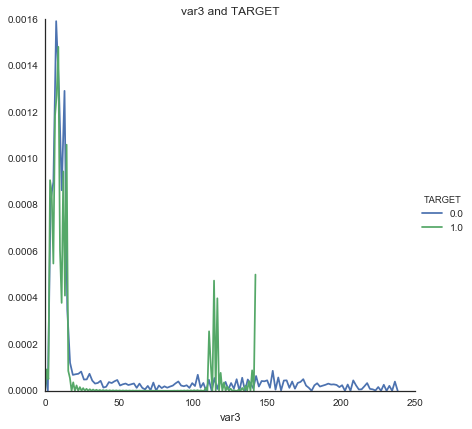

In [53]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var3") \
   .add_legend()
plt.title('var3 and TARGET');
# yeeeeeah, no. Not unless you're in a country in the category 110-140 range.

,columns,min,max
0,'ID,1.0,151838.00
1,var3,-999999.0,238.00
2,var15,5.0,105.00
3,imp_ent_var16_ult1,0.0,210000.00
4,imp_op_var39_comer_ult1,0.0,12888.03


# var15 sure looks like age

In [47]:
# what is var15?
# maybe age
train.var15.describe()

count    76022.000000
mean        33.213438
std         12.959335
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

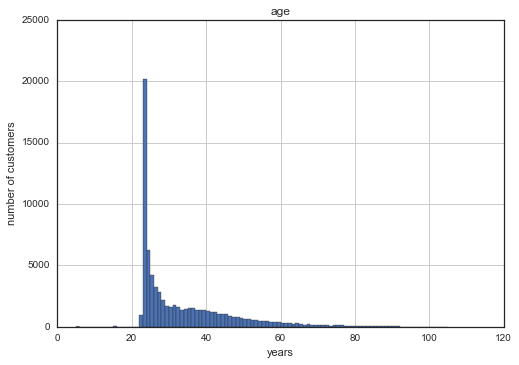

In [7]:
# distribution
train.var15.hist(bins=100)
plt.xlabel('age')
plt.ylabel('number of customers')
plt.title('age')
plt.show()

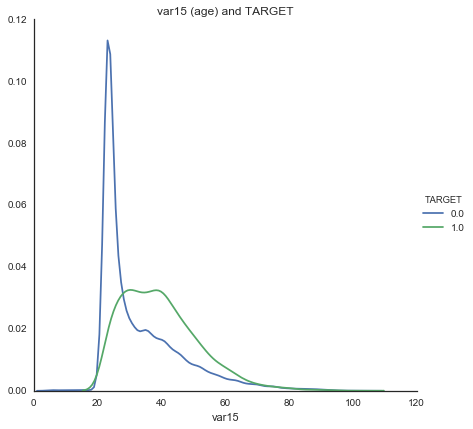

In [40]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('var15 (age) and TARGET');

# num_var4 is bank product count

# var38 is mortgage value

In [44]:
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

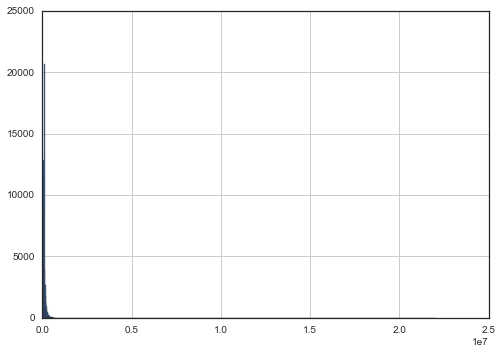

In [43]:
# histogram
train.var38.hist(bins=1000);

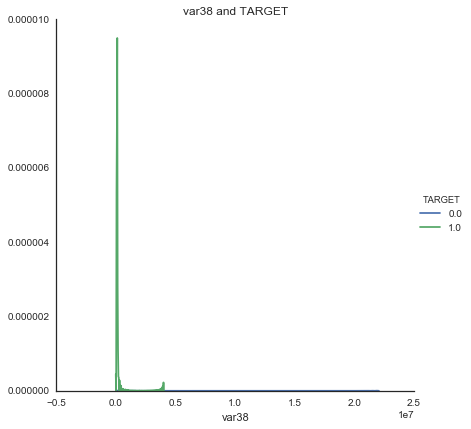

In [39]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var38") \
   .add_legend()
plt.title('var38 and TARGET');

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['var15']
X = santander[feature_cols]
y = santander.TARGET
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)